In [48]:
import seaborn as sns
import numpy as np
import pandas as pd

In [49]:
titanic=pd.read_csv('/content/train.csv')
df=titanic
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [50]:
df.drop(['Name','Ticket','Cabin'],inplace=True,axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


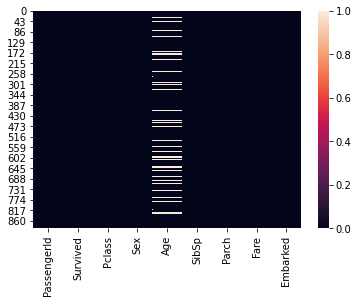

In [51]:
sns.heatmap(df.isnull())

In [52]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Sex              2
Age             88
SibSp            7
Parch            7
Fare           248
Embarked         3
dtype: int64

Here Pcalss, Sex and Embarked seems important to us so we will save it into other temporary df..

In [53]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [54]:
temp=[]
temp.append(pd.get_dummies(df['Pclass']))
temp.append(pd.get_dummies(df['Sex']))
temp.append(pd.get_dummies(df['Embarked']))
temp

[     1  2  3
 0    0  0  1
 1    1  0  0
 2    0  0  1
 3    1  0  0
 4    0  0  1
 ..  .. .. ..
 886  0  1  0
 887  1  0  0
 888  0  0  1
 889  1  0  0
 890  0  0  1
 
 [891 rows x 3 columns],      female  male
 0         0     1
 1         1     0
 2         1     0
 3         1     0
 4         0     1
 ..      ...   ...
 886       0     1
 887       1     0
 888       1     0
 889       0     1
 890       0     1
 
 [891 rows x 2 columns],      C  Q  S
 0    0  0  1
 1    1  0  0
 2    0  0  1
 3    0  0  1
 4    0  0  1
 ..  .. .. ..
 886  0  0  1
 887  0  0  1
 888  0  0  1
 889  1  0  0
 890  0  1  0
 
 [891 rows x 3 columns]]

In [55]:
df_of_temp = pd.concat(temp, axis=1)
df_of_temp

,1,2,3,female,male,C,Q,S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,0,0,1
887,1,0,0,1,0,0,0,1
888,0,0,1,1,0,0,0,1
889,1,0,0,0,1,1,0,0


In [56]:
df = pd.concat((df,df_of_temp), axis=1)

In [58]:
df.drop(['Pclass', 'Sex', 'Embarked'],axis=1,inplace=True)
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,1,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,0,0,13.0000,0,1,0,0,1,0,0,1
887,888,1,19.0,0,0,30.0000,1,0,0,1,0,0,0,1
888,889,0,NaN,1,2,23.4500,0,0,1,1,0,0,0,1
889,890,1,26.0,0,0,30.0000,1,0,0,0,1,1,0,0


In [60]:
df['Age']=df['Age'].interpolate()

In [66]:
x=df.values
y=df['Survived'].values
x = np.delete(x, 1, axis=1)

In [67]:
x

array([[  1. ,  22. ,   1. , ...,   0. ,   0. ,   1. ],
       [  2. ,  38. ,   1. , ...,   1. ,   0. ,   0. ],
       [  3. ,  26. ,   0. , ...,   0. ,   0. ,   1. ],
       ...,
       [889. ,  22.5,   1. , ...,   0. ,   0. ,   1. ],
       [890. ,  26. ,   0. , ...,   1. ,   0. ,   0. ],
       [891. ,  32. ,   0. , ...,   0. ,   1. ,   0. ]])

In [68]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,